# AD-LSTM Proof of Concept

This notebook is a proof of concept for using LSTM RNNs for anomaly detection purposes in time series, sequential data.  
In this notebook, we will:
- Create sequential input/output mapping of 0-100, e.g (1, 2, 3, ... , 100)
    - Create 'data' numpy array of 0-99
    - Create 'target' numpy array of 1-100
- Build LSTM model with Keras
- Make predictions based on our original data. Technically, the model is overfit, but it is for anomaly detection proof of concept only as we can compare the prediction to an erroneous 'dataset'. 
- Print a heatmap of potential anomalies

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense, Dropout

Using TensorFlow backend.


In [3]:
# Create data
data = [[i for i in range(100)]]
data = np.array(data, dtype=float)
target = [[i for i in range(1, 101)]]
target = np.array(target, dtype=float)
test = [[i for i in range(1, 101)]]

# Insert Erros/Anomalies into the test set
test[0][5] = 66.0
test[0][10] = 2
test[0][30] = 50
test[0][35] = 10
test[0][56] = 80
test[0][89] = 100
test[0][90] = 80
test[0][67] = 70
test = np.array(test, dtype=float)

In [4]:
# Reshape data to input into model
data = data.reshape((1, 1, 100))
target = target.reshape((1, 1, 100))
test = test.reshape((1, 1, 100))
#x_test = [i for i in range(100, 200)]
#x_test = np.array(x_test).reshape((1, 1, 100));
#y_test = [i for i in range(101, 201)]
#y_test=np.array(y_test).reshape(1,1,100)

In [6]:
# Build model
model = Sequential()
model.add(LSTM(100, input_shape=(1, 100), return_sequences=True))
model.add(Dense(100))
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
model.fit(data, target, epochs=10000, batch_size=1, verbose=2,validation_data=(data, target))

Train on 1 samples, validate on 1 samples
Epoch 1/10000
0s - loss: 50.5310 - acc: 0.0000e+00 - val_loss: 50.4792 - val_acc: 0.0000e+00
Epoch 2/10000
0s - loss: 50.4792 - acc: 0.0000e+00 - val_loss: 50.4589 - val_acc: 0.0000e+00
Epoch 3/10000
0s - loss: 50.4589 - acc: 0.0000e+00 - val_loss: 50.4418 - val_acc: 0.0000e+00
Epoch 4/10000
0s - loss: 50.4418 - acc: 0.0000e+00 - val_loss: 50.4248 - val_acc: 0.0000e+00
Epoch 5/10000
0s - loss: 50.4248 - acc: 0.0000e+00 - val_loss: 50.4080 - val_acc: 0.0000e+00
Epoch 6/10000
0s - loss: 50.4080 - acc: 0.0000e+00 - val_loss: 50.3904 - val_acc: 0.0000e+00
Epoch 7/10000
0s - loss: 50.3904 - acc: 0.0000e+00 - val_loss: 50.3730 - val_acc: 0.0000e+00
Epoch 8/10000
0s - loss: 50.3730 - acc: 0.0000e+00 - val_loss: 50.3556 - val_acc: 0.0000e+00
Epoch 9/10000
0s - loss: 50.3556 - acc: 0.0000e+00 - val_loss: 50.3382 - val_acc: 0.0000e+00
Epoch 10/10000
0s - loss: 50.3382 - acc: 0.0000e+00 - val_loss: 50.3207 - val_acc: 0.0000e+00
Epoch 11/10000
0s - loss: 5

In [7]:
predict = model.predict(data)

In [8]:
print(predict)

[[[   0.99558878    1.99932802    3.00168705    3.9981432     5.00000477
      6.00096798    7.0019207     8.00052357    8.99363136    9.99818325
     11.00082779   12.00040817   12.99578285   13.99934769   14.99821854
     15.99999142   17.00348854   18.00024223   18.99845123   20.00506973
     20.99485779   21.99478722   22.99926567   24.00051689   25.00497627
     26.00059891   27.00258827   27.99895096   28.99908066   30.00402069
     31.00074577   32.00362778   32.99734879   34.00202179   35.0004425
     35.996315     37.00176239   37.99855042   39.00154114   39.9997673
     41.00148773   41.99684906   43.00014114   43.99962234   45.00055695
     46.00101852   46.99881744   47.99972153   49.00426865   49.99569702
     50.9969101    52.00117493   53.0023613    53.99836349   54.9989357
     56.00063324   56.99420166   58.0032196    58.99837112   59.99864197
     61.00237274   61.998909     62.99991226   63.99459839   65.00021362
     65.9966507    66.99554443   68.0035553    68.9997

In [9]:
#loss_and_metrics = model.evaluate(data, target, batch_size=128)

In [10]:
#print(loss_and_metrics)

In [11]:
error = (((test - predict)**2) / 100)
error = np.round(error, decimals=2)

In [12]:
error = error[0][0]

In [13]:
error = np.reshape(error, (10, 10))

In [14]:
print(error)

[[  0.     0.     0.     0.     0.    36.     0.     0.     0.     0.  ]
 [  0.81   0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  3.61   0.     0.     0.     0.     6.76   0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     5.29   0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.04   0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.  ]
 [  0.     0.     0.     0.     0.     0.     0.     0.     0.     1.  ]
 [  1.21   0.     0.     0.     0.     0.     0.     0.     0.     0.  ]]


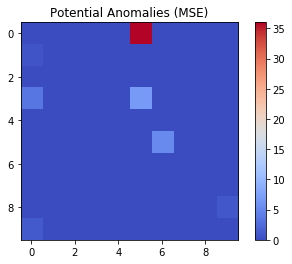

In [16]:
import matplotlib.pyplot as plt
plt.imshow(error, cmap='coolwarm')
plt.colorbar(orientation='vertical')
plt.title("Potential Anomalies (MSE)")
plt.show()